Questão 1

<>:67: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\o'
C:\Users\pedro.rosa\AppData\Local\Temp\ipykernel_1644\1924012020.py:67: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel(r'$\omega^2$ (rad$^2$/s$^2$)')


Matriz de massa (M):
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Matriz de constantes elásticas (K):
[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]
Matriz dinâmica (D):
[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]
Autovalores ordenados (valores próprios):
[-4.00011517e-15  3.94654314e-03  3.94654314e-03  1.57705974e-02
  1.57705974e-02  3.54254985e-02  3.54254985e-02  6.28336777e-02
  6.28336777e-02  9.78869674e-02  9.78869674e-02  1.40447028e-01
  1.40447028e-01  1.90345895e-01  1.90345895e-01  2.47386640e-01
  2.47386640e-01  3.11344149e-01  3.11344149e-01  3.81966011e-01
  3.81966011e-0

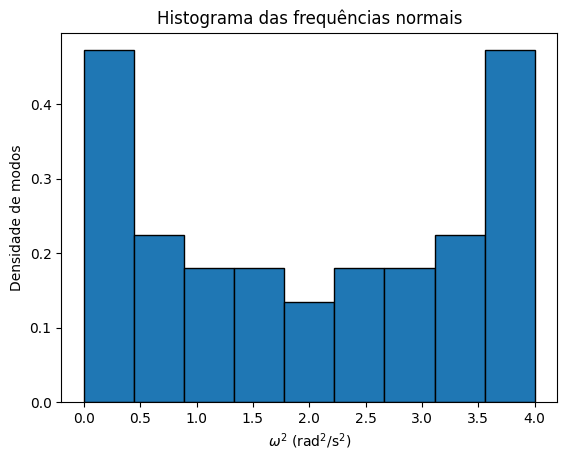

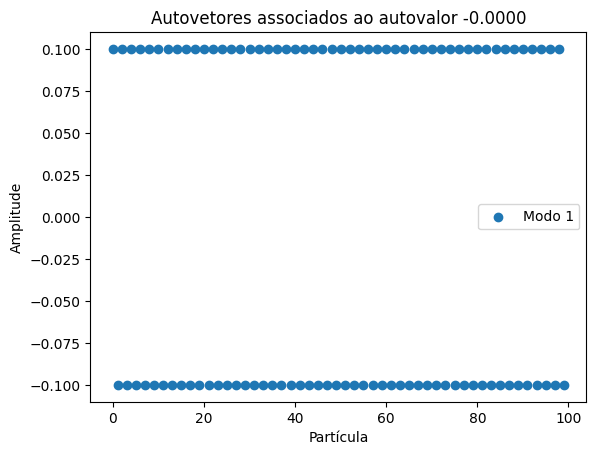

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0 # Constante elástica (N/m)
m = 1.0 # Massa (kg)

N = int(input("Insira o número de partículas:"))

# Caso 1 - Massas homogêneas


# Matriz de massa
M = np.eye(N) * m  # Massa homogênea para todas as partículas
print("Matriz de massa (M):")
print(M)

K = np.zeros((N, N))
for i in range(N):
    K[i, i] = 2 * k
    K[i, (i-1) % N] = -k
    K[i, (i+1) % N] = -k

print("Matriz de constantes elásticas (K):")
print(K)

# Matriz dinâmica (D = M^{-1} K)
D = np.linalg.inv(M) @ K  # ou, como M = m*I, D = K/m
# Alternativamente, mais eficiente:
# D = K / m

print("Matriz dinâmica (D):")
print(D)

# Cálculo dos autovalores e autovetores da matriz dinâmica
autovalores = np.linalg.eigvals(D)
autovetores = np.linalg.eig(D)[1]

'''print("Autovalores (valores próprios):")
print(autovalores)

print("Autovetores (vetores próprios):")
for i, v in enumerate(autovetores.T):  
    print(f"Modo {i+1}: {v}")'''

lista_index = np.argsort(autovalores.real) # Ordena os autovalores reais

autovalores_ordenados = autovalores[lista_index]
autovetores_ordenados = autovetores[:, lista_index]

print("Autovalores ordenados (valores próprios):")
print(autovalores_ordenados)

print("Autovetores ordenados (vetores próprios):")
for i, v in enumerate(autovetores_ordenados.T):
    print(f"Modo {i+1}: {v}")     

'''print("Autovalores (valores próprios):")
print(autovalores)'''

print("Frequências de oscilação (rad/s):")
for i, f in enumerate(autovalores):
    print(f"Modo {i+1}: {f:.4f}")

'''# Opcional: plotar as frequências
plt.scatter(range(1, N+1), np.sort(autovalores.real), s=5)
plt.xlabel('Modo')
plt.ylabel(r'$\omega^2$ (rad$^2$/s$^2$)')
plt.title('Frequências normais da cadeia circular')
plt.show()'''


plt.hist(autovalores.real, bins=9, density=True, edgecolor='black')
plt.xlabel(r'$\omega^2$ (rad$^2$/s$^2$)')
plt.ylabel('Densidade de modos')
plt.title('Histograma das frequências normais')
plt.show()

# Escolha o autovalor alvo (por exemplo, o primeiro autovalor ordenado)
autovalor_alvo = autovalores_ordenados[0]
tolerancia = 1e-8  # tolerância para comparar autovalores

# Encontre os índices dos autovalores iguais (ou muito próximos)
indices = np.where(np.abs(autovalores_ordenados - autovalor_alvo) < tolerancia)[0]

plt.figure()
for i in indices:
    plt.scatter(range(N), autovetores[:, i], label=f'Modo {i+1}')
plt.xlabel('Partícula')
plt.ylabel('Amplitude')
plt.title(f'Autovetores associados ao autovalor {autovalor_alvo:.4f}')
plt.legend()
plt.show()        

